In [3]:
# task 1.1.1. Define the Hydrogen 2p Orbital Function
import numpy as np

# Define the Bohr radius in atomic units
a0 = 1.0

# check point 1.1.1-1) Convert the hydrogen atom’s 2p orbital ψ2pz from polar coordinates (r, θ) to Cartesian coordinates
# check point 1.1.1-2) Write a Python function psi_2p_z(x, y, z) that computes ψ2pz (x, y, z) at a given point
# Function to compute the hydrogen 2p_z orbital wavefunction in Cartesian coordinates
def psi_2p_z(x, y, z):
    """
    Computes the hydrogen 2p_z orbital wavefunction ψ2pz at a given point (x, y, z) in Cartesian coordinates.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    z (float): z-coordinate of the point.

    Returns:
    float: The value of the 2p_z wavefunction at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)  # radial distance
    if r == 0:
        return 0
    psi_value = (1 / (4 * np.sqrt(2 * np.pi) * a0**(3/2))) * (r / a0) * np.exp(-r / (2 * a0)) * (z / r)
    return psi_value


Estimated S(R) for N = 100: 0.11784896880647787
Estimated S(R) for N = 1000: 0.5121671528017366
Estimated S(R) for N = 10000: 0.9021597216156622
Estimated S(R) for N = 100000: 0.7296869955557025
Estimated S(R) for N = 1000000: 0.7340638898022999
Estimated S(R) for N = 10000000: 0.7335398844786941
Estimated S(R) for N = 100000000: 0.7362017387882699


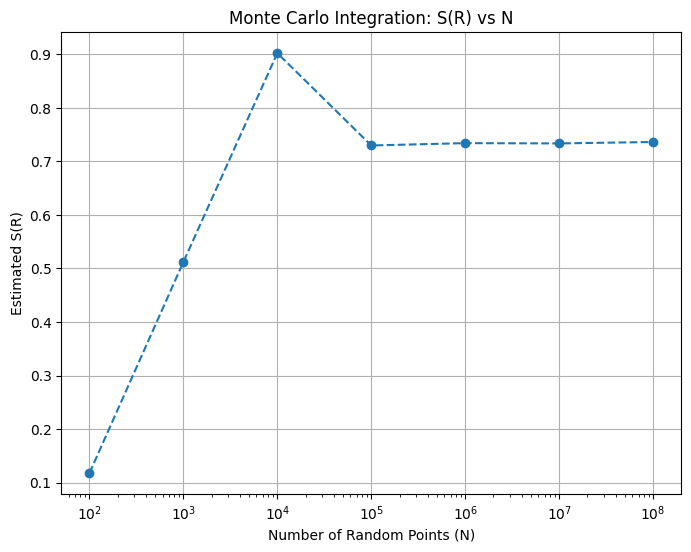

In [4]:
# task 1.1.2. Compute the Overlap Integral Using Random Sampling
import matplotlib.pyplot as plt
from hw5_1_function import monte_carlo_overlap_integral

# Define constants
a0 = 1.0  # Bohr radius in atomic units
R = 2.0   # check point 1.1.2-1) Separation distance between the orbitals in atomic units
L = 20.0  # Cube size for integration limits

# check point 1.1.2-5) Perform calculations for various numbers of random points N
N_values = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
S_R_values = []

# Set random seed for reproducibility
np.random.seed(42)

# Loop over different N values
for N in N_values:
    S_R = monte_carlo_overlap_integral(R, N, L)
    S_R_values.append(S_R)
    print(f"Estimated S(R) for N = {N}: {S_R}")

# check point 1.1.2-6) Plotting S(R) vs N on a logarithmic scale
plt.figure(figsize=(8,6))
plt.plot(N_values, S_R_values, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Estimated S(R)')
plt.title('Monte Carlo Integration: S(R) vs N')
plt.grid(True)
plt.show()


# check point 1.1.2-7) Discuss the convergence of your results
# Initially, for the small values of N (N = 1000), the estimated of S (R) fluctuated. This is expected because Monte carlo simulations typically suffer from high variance when the sample size is small, leading to significant uncertainty in the estimate.
# As N increase to 10^4, the estimates stabilize and the fluctuations reduce.
# After N = 10^5, the estimates converge to a stable value around S(R) = 0.73
# As the number of samples increases, the estimate converges towards the true value, and the fluctuations become smaller.

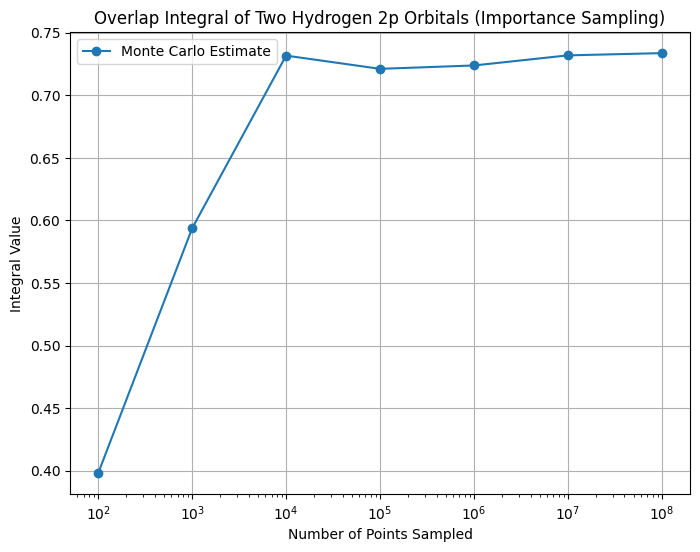

In [3]:
# task 1.1.3. Improve Efficiency Using Importance Sampling
from scipy.stats import expon

# Define the hydrogen 2p_z orbital wavefunction in Cartesian coordinates
def psi_2p_z(x, y, z, a0=1.0):
    """
    Computes the hydrogen 2p_z orbital wavefunction ψ2pz at a given point (x, y, z) in Cartesian coordinates.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    z (float): z-coordinate of the point.
    a0 (float): Bohr radius in atomic units.

    Returns:
    float: The value of the 2p_z wavefunction at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    return (1 / (4 * np.sqrt(2 * np.pi) * a0**(3/2))) * (r / a0) * np.exp(-r / (2 * a0)) * (z / r)

# check point 1.1.3-1) Define the importance sampling distribution g(x, y, z)
def g_distribution(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(-r)

# # check point 1.1.3-4) Set the number of points to sample
n_points_list = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

# Create a list to store the results
averages = []

# Loop over the number of points to sample
for n_points in n_points_list:
    # check point 1.1.3-2)  Generate random points using exponential distribution for importance sampling
    x = expon.rvs(size=n_points, scale=1)  # Sampling from exponential distribution
    y = expon.rvs(size=n_points, scale=1)
    z = expon.rvs(size=n_points, scale=1)
    
    # Numerator: Overlap between psi_2p_z at (x, y, z + R/2) and (x, y, z - R/2)
    numer = psi_2p_z(x, y, z + 1.0) * psi_2p_z(x, y, z - 1.0)
    
    # Denominator: Importance sampling probability density function g(x, y, z)
    # denom = g_distribution(x, y, z)
    denom = expon.pdf(x) * expon.pdf(y) * expon.pdf(z)

    # # check point 1.1.3-3) Adjust the integrand in your calculation by dividing by g(x, y, z)
    integrand = numer / denom
    
    # Estimate the integral using the average of the integrand
    integral = 8 * np.mean(integrand)
    
    # Store the integral value
    averages.append(integral)

# # check point 1.1.3-5)Plot the results
plt.figure(figsize=(8, 6))
plt.plot(n_points_list, averages, marker='o', linestyle='-', label='Monte Carlo Estimate')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two Hydrogen 2p Orbitals (Importance Sampling)')
plt.legend()
plt.grid(True)
plt.show()

# # check point 1.1.3-6) Compare the efficiency and convergence with the random sampling method
# In comparing the efficiency and convergence of the two methods, task 1.1.3 (importance sampling) is much more efficient, converging to a stable result within a significantly shorter time (25 seconds) compared to task 1.1.2 (random sampling), which took over 10 minutes. 
# Both graphs show similar patterns of convergence (~0.736), but the importance sampling method achieves a more stable result with fewer sample points (10^4), whereas random sampling takes longer and requires more points to stabilize. 
# This demonstrates that importance sampling is a better approach for improving convergence and reducing computation time.

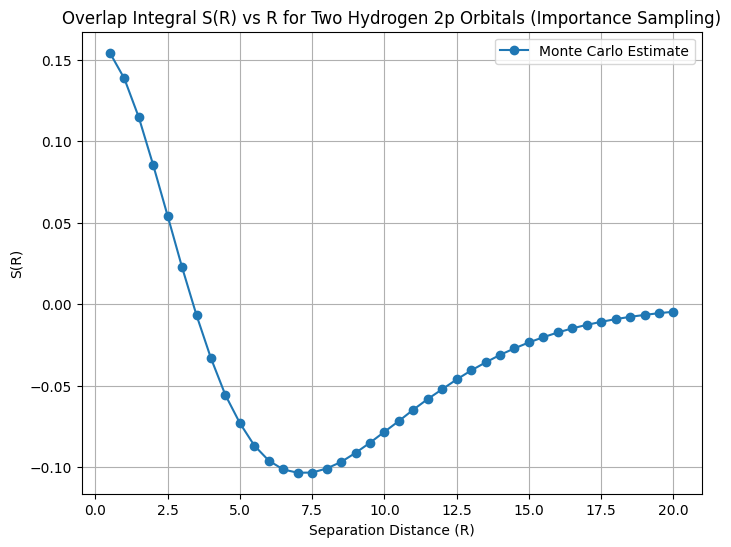

In [8]:
# task 1.1.4. Plot the Overlap Integral as a Function of Separation Distance

# check point 1.1.4-2) Set the number of points to sample
n_points = 1000000  # Fixed N

# Define a range of separation distances R
R_values = np.arange(0.5, 20.5, 0.5)  # R from 0.5 to 20.0 in steps of 0.5

# Create a list to store the results for S(R)
S_R_values = []

# Loop over the separation distances R
for R in R_values:
    # Generate random points using exponential distribution for importance sampling
    x = expon.rvs(size=n_points, scale=1)  # Sampling from exponential distribution
    y = expon.rvs(size=n_points, scale=1)
    z = expon.rvs(size=n_points, scale=1)
    
    # Numerator: Overlap between psi_2p_z at (x, y, z + R/2) and (x, y, z - R/2)
    numer = psi_2p_z(x, y, z + R / 2) * psi_2p_z(x, y, z - R / 2)
    
    # Denominator: Importance sampling probability density function g(x, y, z)
    denom = g_distribution(x, y, z)
    
    # Compute the integrand
    integrand = numer / denom
    
    # check point 1.1.4-1) Estimate the integral S(R) using the average of the integrand
    integral = 8 * np.mean(integrand)
    
    # Store the value of S(R)
    S_R_values.append(integral)

# check point 1.1.4-3) Plot S(R) versus R
plt.figure(figsize=(8, 6))
plt.plot(R_values, S_R_values, marker='o', linestyle='-', label='Monte Carlo Estimate')
plt.xlabel('Separation Distance (R)')
plt.ylabel('S(R)')
plt.title('Overlap Integral S(R) vs R for Two Hydrogen 2p Orbitals (Importance Sampling)')
plt.legend()
plt.grid(True)
plt.show()

# check point 1.1.4-4) Interpret the change in sign of S(R) as R increases.
# The change in sign of S(R) as R increases can be explained by the phase and symmetry of the hydrogen 2p orbitals. 
# When the two orbitals are close together (small R), they overlap in regions of the same phase, leading to positive values of S(R). 
# As R increases, the regions where the phases of the orbitals are opposite start to dominate, leading to negative overlap values. 
# As R continues to increase further, the overlap becomes negligible, and S(R) approaches zero. 
# This behavior reflects the fact that at larger separations, the interaction between the two orbitals diminishes.


In [ ]:
# task 1.1.5) Analysis and Discussion

# check point 1.1.5-1) Analyze your results and explain why importance sampling improves efficiency

# Importance sampling improves efficiency by focusing sampling in regions where the integrand contributes significantly, reducing wasted effort on regions with negligible impact. 
# In the hydrogen 2p orbital overlap, importance sampling allows for faster convergence by targeting areas where the wavefunction overlap is higher. 
# This method resulted in quicker stabilization of the results (25 seconds vs. 10 minutes for random sampling) and fewer fluctuations. 
# Overall, importance sampling enhances computational efficiency and accuracy by reducing variance in the estimates.

# check point 1.1.5-2) Comment on the physical significance of the overlap integral and its dependence on R

# Physical Significance of the Overlap Integral:
# The overlap integral S(R) measures the extent to which two wavefunctions overlap as a function of their separation. 
# It quantifies the strength of interaction between orbitals, influencing bonding behavior. 
# A larger overlap typically indicates stronger bonding interactions, while smaller or negative overlap reflects weak or repulsive interactions.


# Dependence on R: At small R, S(R) is positive, indicating strong, constructive overlap between the orbitals. 
# As R increases, the overlap decreases, becoming negative at intermediate distances due to destructive interference. 
# At large R, S(R) approaches zero, showing that the orbitals are too far apart to interact significantly.